# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp():
    """
    Build your own model
    """
    input_layer = keras.layers.Input(x_train.shape[-1])
    num_neurons=[512,256,128]
    
    for i, n in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(n, activation='relu')(input_layer)
        else:
            x = keras.layers.Dense(n, activation='relu')(x)
        
        out = keras.layers.Dense(10, activation='softmax')(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    return model

In [6]:
model = build_mlp()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
optimizers = [keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), keras.optimizers.SGD(lr=0.001, nesterov=True, momentum=MOMENTUM)]

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for opt in optimizers:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp()
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 1s 7ms/step - loss: 2.2638 - ac

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0202 - accuracy: 0.2773 - val_loss: 1.8574 - val_accuracy: 0.3411
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7981 - accuracy: 0.3697 - val_loss: 1.7546 - val_accuracy: 0.3840
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7157 - accuracy: 0.4010 - val_loss: 1.6803 - val_accuracy: 0.4084
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6582 - accuracy: 0.4184 - val_loss: 1.6451 - val_accuracy: 0.4228
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6109 - accuracy: 0.4371 - val_loss: 1.5955 - val_accuracy: 0.4381
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5710 - accuracy: 0.4501 - val_loss: 1.5703 - val_accuracy: 0.4445
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5380 - accuracy: 0.4620 - val_loss: 1.5440 - val_accuracy: 0.4585
Epoch 

196/196 [==============================] - 1s 6ms/step - loss: 2.2798 - accuracy: 0.2105 - val_loss: 2.1041 - val_accuracy: 0.2324
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8947 - accuracy: 0.3169 - val_loss: 1.7875 - val_accuracy: 0.3457
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7923 - accuracy: 0.3555 - val_loss: 1.8988 - val_accuracy: 0.3186
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7199 - accuracy: 0.3830 - val_loss: 1.7644 - val_accuracy: 0.3704
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6623 - accuracy: 0.4057 - val_loss: 1.6996 - val_accuracy: 0.3855
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6084 - accuracy: 0.4243 - val_loss: 1.9033 - val_accuracy: 0.3345
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5743 - accuracy: 0.4386 - val_loss: 1.5788 - val_accuracy: 0.4347
Epoch 8/50
196/19

196/196 [==============================] - 1s 5ms/step - loss: 2.0601 - accuracy: 0.2612 - val_loss: 1.8827 - val_accuracy: 0.3447
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8213 - accuracy: 0.3629 - val_loss: 1.7733 - val_accuracy: 0.3816
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7309 - accuracy: 0.3940 - val_loss: 1.6969 - val_accuracy: 0.4084
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6695 - accuracy: 0.4160 - val_loss: 1.6455 - val_accuracy: 0.4237
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6197 - accuracy: 0.4340 - val_loss: 1.6169 - val_accuracy: 0.4358
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5772 - accuracy: 0.4486 - val_loss: 1.5734 - val_accuracy: 0.4450
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5437 - accuracy: 0.4602 - val_loss: 1.5494 - val_accuracy: 0.4534
Epoch 8/50
196/19

196/196 [==============================] - 1s 7ms/step - loss: 2.2854 - accuracy: 0.2089 - val_loss: 2.0324 - val_accuracy: 0.2502
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8988 - accuracy: 0.3121 - val_loss: 1.9077 - val_accuracy: 0.3054
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7983 - accuracy: 0.3511 - val_loss: 1.8514 - val_accuracy: 0.3411
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7269 - accuracy: 0.3810 - val_loss: 1.9002 - val_accuracy: 0.3291
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6638 - accuracy: 0.4043 - val_loss: 1.7492 - val_accuracy: 0.3982
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6219 - accuracy: 0.4202 - val_loss: 1.6637 - val_accuracy: 0.4105
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5848 - accuracy: 0.4349 - val_loss: 1.6876 - val_accuracy: 0.4094
Epoch 8/50
196/19

196/196 [==============================] - 1s 6ms/step - loss: 2.0319 - accuracy: 0.2708 - val_loss: 1.8688 - val_accuracy: 0.3426
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8112 - accuracy: 0.3625 - val_loss: 1.7639 - val_accuracy: 0.3863
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7274 - accuracy: 0.3951 - val_loss: 1.6986 - val_accuracy: 0.4043
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6656 - accuracy: 0.4179 - val_loss: 1.6398 - val_accuracy: 0.4291
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6168 - accuracy: 0.4349 - val_loss: 1.5972 - val_accuracy: 0.4435
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5747 - accuracy: 0.4480 - val_loss: 1.5639 - val_accuracy: 0.4497
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5388 - accuracy: 0.4596 - val_loss: 1.5501 - val_accuracy: 0.4529
Epoch 8/50
196/19

196/196 [==============================] - 1s 7ms/step - loss: 2.2500 - accuracy: 0.2166 - val_loss: 1.9737 - val_accuracy: 0.2753
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8847 - accuracy: 0.3169 - val_loss: 1.7795 - val_accuracy: 0.3590
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7822 - accuracy: 0.3597 - val_loss: 1.7748 - val_accuracy: 0.3606
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7103 - accuracy: 0.3846 - val_loss: 1.6439 - val_accuracy: 0.4150
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6537 - accuracy: 0.4095 - val_loss: 1.8917 - val_accuracy: 0.3473
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6074 - accuracy: 0.4264 - val_loss: 1.6997 - val_accuracy: 0.3928
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5641 - accuracy: 0.4372 - val_loss: 1.6403 - val_accuracy: 0.4178
Epoch 8/50
196/19

196/196 [==============================] - 1s 6ms/step - loss: 2.0351 - accuracy: 0.2727 - val_loss: 1.8621 - val_accuracy: 0.3482
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8011 - accuracy: 0.3703 - val_loss: 1.7557 - val_accuracy: 0.3811
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7220 - accuracy: 0.3988 - val_loss: 1.7225 - val_accuracy: 0.3991
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6653 - accuracy: 0.4195 - val_loss: 1.6430 - val_accuracy: 0.4230
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6202 - accuracy: 0.4340 - val_loss: 1.6124 - val_accuracy: 0.4359
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5814 - accuracy: 0.4478 - val_loss: 1.5797 - val_accuracy: 0.4435
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5491 - accuracy: 0.4585 - val_loss: 1.5616 - val_accuracy: 0.4481
Epoch 8/50
196/19

Epoch 1/50
196/196 [==============================] - 1s 7ms/step - loss: 2.3105 - accuracy: 0.2099 - val_loss: 2.2159 - val_accuracy: 0.2397
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8948 - accuracy: 0.3160 - val_loss: 1.7922 - val_accuracy: 0.3483
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7858 - accuracy: 0.3595 - val_loss: 1.6905 - val_accuracy: 0.3859
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7109 - accuracy: 0.3871 - val_loss: 1.7830 - val_accuracy: 0.3706
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6597 - accuracy: 0.4114 - val_loss: 1.8592 - val_accuracy: 0.3531
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6162 - accuracy: 0.4237 - val_loss: 1.6087 - val_accuracy: 0.4137
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5687 - accuracy: 0.4403 - val_loss: 1.7708 - val_accuracy: 0.3825
Epoch 

196/196 [==============================] - 1s 7ms/step - loss: 2.0490 - accuracy: 0.2681 - val_loss: 1.8778 - val_accuracy: 0.3379
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8122 - accuracy: 0.3634 - val_loss: 1.7579 - val_accuracy: 0.3831
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7219 - accuracy: 0.3983 - val_loss: 1.6900 - val_accuracy: 0.4123
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6628 - accuracy: 0.4192 - val_loss: 1.6349 - val_accuracy: 0.4262
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6150 - accuracy: 0.4355 - val_loss: 1.6056 - val_accuracy: 0.4370
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5771 - accuracy: 0.4473 - val_loss: 1.5755 - val_accuracy: 0.4465
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5422 - accuracy: 0.4596 - val_loss: 1.5489 - val_accuracy: 0.4587
Epoch 8/50
196/19

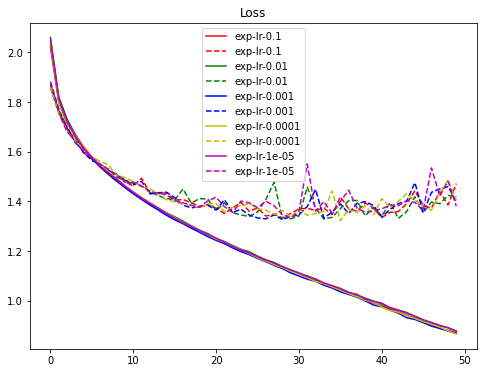

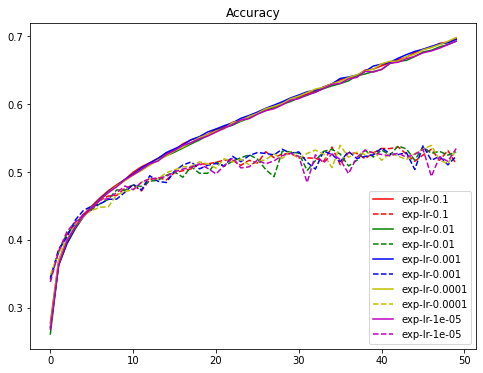

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()